In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

(40, 1)
(40,)


D:\anaconda\envs\py37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<bound method BaseEstimator.get_params of SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>
[ 0.19653196  0.16991266  0.24336668  0.37818678  0.40519314 -0.93340565
  0.64789293  0.65854738  0.67458322  0.68306102  1.93830062  0.8169914
  0.91840029  0.9215134   0.93805654  0.14805336  0.98627674  0.9886462
  0.98800432  0.97272224 -0.34416091  0.9609822   0.95649751  0.87424524
  0.76569524 -0.52511525  0.36944367  0.27445952  0.2434721   0.20612731
 -1.09557519 -0.15312807 -0.6221273  -0.63727819 -0.64358093  0.57929858
 -0.95200082 -0.99905052 -0.99943995 -0.99895755]
[ 0.09671677  0.12918277  0.1900027   0.30574113  0.32954651  0.35833172
  0.55244753  0.56259612  0.57792758  0.58606068  0.67143347  0.71709392
  0.81958159  0.82277537  0.83979879  0.84898134  0.88999038  0.8924866
  0.89222806  0.87625988  0.86857652  0.86397884  0.85928755  0.77352614
  0.66165043  0.52087117  0.269616

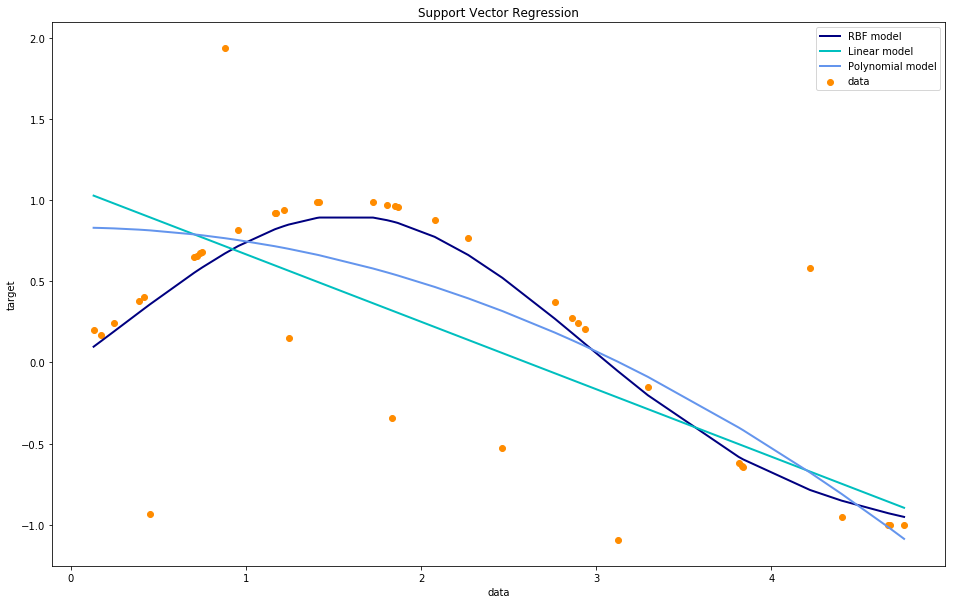

In [21]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列
y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行

print(X.shape)
print(y.shape)

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model                  #这里用的是SVR (dual) kernel 模型，可以自行选择kernel，必须参数有C和epsilon，
                                        #rbf kernel还需要gamma，poly kernel还需要degree
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# analyse the results
param_rbf=svr_rbf.get_params
print(param_rbf)
print(y)
print(y_rbf)

# look at the results
plt.figure(figsize=(16,10))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
